# App6

*  An App with 6 functions with different types of workload to validate the performance of the optimization algorithm
*  There are 1 branch, 1 parallel, 1 self-loop, and 1 cycle in App6

In [1]:
import os
from io import BytesIO
import time
import zipfile
import numpy as np
import boto3
from tqdm import tqdm
from datetime import datetime, timezone
from time import gmtime, strftime
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lambda_client = boto3.client('lambda')

In [3]:
function_prefix='ServerlessAppPerfOpt'

In [4]:
App_name = 'App6'

## Update all Functions in App6

### Types of workload

* Function 1: Disk IO Intensive
    * Write a 1MB file to the disk for 50 times
* Function 2: CPU Intensive
    * Factorial 28000
* Function 3: CPU Intensive
    * Fibonacci 28
* Function 4: Network IO Intensive
    * Download and upload a 25MB file from and to the S3 bucket in the same region
* Function 5: CPU Intensive
    * SHA512 Hashing a string
* Function 6: CPU Intensive
    * Calculate Pi 10000

### Update Function Code

In [4]:
functions=[]
for file in os.listdir('functions'):
    path=os.path.abspath(os.path.join(os.path.dirname('__file__'), 'functions/'+file))
    if not file.startswith('.') and os.path.isdir(path):
        functions.append(file)
for function_folder in functions:
    buf = BytesIO()
    with zipfile.ZipFile(buf, 'w') as z:
        for file in os.listdir('functions/'+function_folder):
            z.write(os.path.abspath(os.path.join(os.path.dirname('__file__'), 'functions/{}/{}'.format(function_folder,file))), os.path.basename(os.path.join(os.path.dirname('__file__'), 'functions/{}/{}'.format(function_folder,file))))
    buf.seek(0)
    pkg = buf.read()
    lambda_client.update_function_code(FunctionName='{}_{}'.format(function_prefix, function_folder),ZipFile=pkg)

### Update Function Memory and Timeout Configuration
* Available Memory Configurations: 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1600, 1664, 1728, 1792, 1856, 1920, 1984, 2048, 2112, 2176, 2240, 2304, 2368, 2432, 2496, 2560, 2624, 2688, 2752, 2816, 2880, 2944, 3008


In [5]:
mem_config_list={
    'f1':128,
    'f2':128,
    'f3':128,
    'f4':128,
    'f5':128,
    'f6':128
}
timeout_config_list={
    'f1':60,
    'f2':60,
    'f3':60,
    'f4':60,
    'f5':60,
    'f6':60
}

In [6]:
for function in mem_config_list.keys():
    lambda_client.update_function_configuration(FunctionName='{}_{}'.format(function_prefix, function), MemorySize=mem_config_list[function], Timeout=timeout_config_list[function])

### Test Run

#### Function 1

In [ ]:
lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f1'), InvocationType='Event')

#### Function 2

In [ ]:
lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f2'), InvocationType='Event')

#### Function 3

In [ ]:
lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f3'), InvocationType='Event')

#### Function 4

In [ ]:
lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f4'), InvocationType='Event')

## Execute Functions to Get the Performance Curve

* Run each function under each memory configuration for 100 times

In [6]:
available_mem_list=[128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1600, 1664, 1728, 1792, 1856, 1920, 1984, 2048, 2112, 2176, 2240, 2304, 2368, 2432, 2496, 2560, 2624, 2688, 2752, 2816, 2880, 2944, 3008]

In [8]:
for mem in available_mem_list:
    print('Memory: {} Timestamp: {} UTC: {}'.format(mem,time.time(),strftime("%d %b %Y %H:%M:%S +0000", gmtime())))
    mem_config={'f1':mem, 'f2':mem, 'f3':mem, 'f4':mem}
    for function in mem_config.keys():
        lambda_client.update_function_configuration(FunctionName='{}_{}'.format(function_prefix, function), MemorySize=mem_config[function])
    time.sleep(1)
    for i in tqdm(range(100)):
        time.sleep(10)
        lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f1'), InvocationType='Event')
        lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f2'), InvocationType='Event')
        lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f3'), InvocationType='Event')
        lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f4'), InvocationType='Event')

Memory: 128 Timestamp: 1579041852.0039446 UTC: 14 Jan 2020 22:44:12 +0000


100%|██████████| 100/100 [20:08<00:00, 12.70s/it]


Memory: 192 Timestamp: 1579043062.2531226 UTC: 14 Jan 2020 23:04:22 +0000


100%|██████████| 100/100 [19:54<00:00, 11.86s/it]


Memory: 256 Timestamp: 1579044258.4572241 UTC: 14 Jan 2020 23:24:18 +0000


100%|██████████| 100/100 [20:08<00:00, 11.92s/it]


Memory: 320 Timestamp: 1579045468.3896778 UTC: 14 Jan 2020 23:44:28 +0000


100%|██████████| 100/100 [19:52<00:00, 11.89s/it]


Memory: 384 Timestamp: 1579046662.580712 UTC: 15 Jan 2020 00:04:22 +0000


100%|██████████| 100/100 [21:05<00:00, 11.84s/it]


Memory: 448 Timestamp: 1579047930.236792 UTC: 15 Jan 2020 00:25:30 +0000


100%|██████████| 100/100 [20:10<00:00, 12.04s/it]


Memory: 512 Timestamp: 1579049142.2645512 UTC: 15 Jan 2020 00:45:42 +0000


100%|██████████| 100/100 [20:55<00:00, 19.73s/it]


Memory: 576 Timestamp: 1579050399.5767913 UTC: 15 Jan 2020 01:06:39 +0000


100%|██████████| 100/100 [20:07<00:00, 11.90s/it]


Memory: 640 Timestamp: 1579051608.8831959 UTC: 15 Jan 2020 01:26:48 +0000


100%|██████████| 100/100 [19:58<00:00, 11.90s/it]


Memory: 704 Timestamp: 1579052809.4470654 UTC: 15 Jan 2020 01:46:49 +0000


100%|██████████| 100/100 [21:01<00:00, 11.85s/it]


Memory: 768 Timestamp: 1579054073.0420508 UTC: 15 Jan 2020 02:07:53 +0000


100%|██████████| 100/100 [20:25<00:00, 11.93s/it]


Memory: 832 Timestamp: 1579055300.438117 UTC: 15 Jan 2020 02:28:20 +0000


100%|██████████| 100/100 [20:14<00:00, 11.88s/it]


Memory: 896 Timestamp: 1579056516.8195376 UTC: 15 Jan 2020 02:48:36 +0000


100%|██████████| 100/100 [20:25<00:00, 11.85s/it]


Memory: 960 Timestamp: 1579057743.791923 UTC: 15 Jan 2020 03:09:03 +0000


100%|██████████| 100/100 [19:59<00:00, 11.84s/it]


Memory: 1024 Timestamp: 1579058945.098728 UTC: 15 Jan 2020 03:29:05 +0000


100%|██████████| 100/100 [20:07<00:00, 11.67s/it]


Memory: 1088 Timestamp: 1579060154.610644 UTC: 15 Jan 2020 03:49:14 +0000


100%|██████████| 100/100 [20:16<00:00, 12.04s/it]


Memory: 1152 Timestamp: 1579061378.9555213 UTC: 15 Jan 2020 04:09:38 +0000


100%|██████████| 100/100 [20:19<00:00, 14.99s/it]


Memory: 1216 Timestamp: 1579062600.0608246 UTC: 15 Jan 2020 04:30:00 +0000


100%|██████████| 100/100 [20:17<00:00, 12.44s/it]


Memory: 1280 Timestamp: 1579063819.4794838 UTC: 15 Jan 2020 04:50:19 +0000


100%|██████████| 100/100 [19:51<00:00, 12.93s/it]


Memory: 1344 Timestamp: 1579065013.123682 UTC: 15 Jan 2020 05:10:13 +0000


100%|██████████| 100/100 [20:16<00:00, 12.14s/it]


Memory: 1408 Timestamp: 1579066231.9581819 UTC: 15 Jan 2020 05:30:31 +0000


100%|██████████| 100/100 [20:10<00:00, 11.56s/it]


Memory: 1472 Timestamp: 1579067444.096762 UTC: 15 Jan 2020 05:50:44 +0000


100%|██████████| 100/100 [20:10<00:00, 11.79s/it]


Memory: 1536 Timestamp: 1579068655.9538372 UTC: 15 Jan 2020 06:10:55 +0000


100%|██████████| 100/100 [20:33<00:00, 11.92s/it]


Memory: 1600 Timestamp: 1579069891.1314635 UTC: 15 Jan 2020 06:31:31 +0000


100%|██████████| 100/100 [20:17<00:00, 11.91s/it]


Memory: 1664 Timestamp: 1579071110.4944956 UTC: 15 Jan 2020 06:51:50 +0000


100%|██████████| 100/100 [20:07<00:00, 12.11s/it]


Memory: 1728 Timestamp: 1579072319.1879532 UTC: 15 Jan 2020 07:11:59 +0000


100%|██████████| 100/100 [19:52<00:00, 11.73s/it]


Memory: 1792 Timestamp: 1579073513.2881784 UTC: 15 Jan 2020 07:31:53 +0000


100%|██████████| 100/100 [20:06<00:00, 11.81s/it]


Memory: 1856 Timestamp: 1579074721.9061418 UTC: 15 Jan 2020 07:52:01 +0000


100%|██████████| 100/100 [20:04<00:00, 11.91s/it]


Memory: 1920 Timestamp: 1579075927.9649644 UTC: 15 Jan 2020 08:12:07 +0000


100%|██████████| 100/100 [19:58<00:00, 11.86s/it]


Memory: 1984 Timestamp: 1579077128.6229088 UTC: 15 Jan 2020 08:32:08 +0000


100%|██████████| 100/100 [20:05<00:00, 13.66s/it]


Memory: 2048 Timestamp: 1579078336.14939 UTC: 15 Jan 2020 08:52:16 +0000


100%|██████████| 100/100 [20:00<00:00, 11.75s/it]


Memory: 2112 Timestamp: 1579079538.3846934 UTC: 15 Jan 2020 09:12:18 +0000


100%|██████████| 100/100 [20:43<00:00, 12.04s/it]


Memory: 2176 Timestamp: 1579080783.5590177 UTC: 15 Jan 2020 09:33:03 +0000


100%|██████████| 100/100 [20:20<00:00, 11.91s/it]


Memory: 2240 Timestamp: 1579082005.4150898 UTC: 15 Jan 2020 09:53:25 +0000


100%|██████████| 100/100 [20:34<00:00, 12.13s/it]


Memory: 2304 Timestamp: 1579083241.9668384 UTC: 15 Jan 2020 10:14:01 +0000


100%|██████████| 100/100 [20:06<00:00, 11.86s/it]


Memory: 2368 Timestamp: 1579084450.0347123 UTC: 15 Jan 2020 10:34:10 +0000


100%|██████████| 100/100 [20:11<00:00, 11.77s/it]


Memory: 2432 Timestamp: 1579085663.4781547 UTC: 15 Jan 2020 10:54:23 +0000


100%|██████████| 100/100 [20:17<00:00, 11.89s/it]


Memory: 2496 Timestamp: 1579086883.0408518 UTC: 15 Jan 2020 11:14:43 +0000


100%|██████████| 100/100 [19:56<00:00, 11.86s/it]


Memory: 2560 Timestamp: 1579088081.6897876 UTC: 15 Jan 2020 11:34:41 +0000


100%|██████████| 100/100 [20:16<00:00, 13.56s/it]


Memory: 2624 Timestamp: 1579089300.2402318 UTC: 15 Jan 2020 11:55:00 +0000


100%|██████████| 100/100 [20:54<00:00, 13.51s/it]


Memory: 2688 Timestamp: 1579090556.399463 UTC: 15 Jan 2020 12:15:56 +0000


100%|██████████| 100/100 [20:04<00:00, 11.88s/it]


Memory: 2752 Timestamp: 1579091763.0838249 UTC: 15 Jan 2020 12:36:03 +0000


100%|██████████| 100/100 [20:32<00:00, 11.95s/it]


Memory: 2816 Timestamp: 1579092997.667166 UTC: 15 Jan 2020 12:56:37 +0000


100%|██████████| 100/100 [21:04<00:00, 11.68s/it]


Memory: 2880 Timestamp: 1579094263.8213608 UTC: 15 Jan 2020 13:17:43 +0000


100%|██████████| 100/100 [20:29<00:00, 12.81s/it]


Memory: 2944 Timestamp: 1579095494.7823896 UTC: 15 Jan 2020 13:38:14 +0000


100%|██████████| 100/100 [20:30<00:00, 12.60s/it]


Memory: 3008 Timestamp: 1579096726.5438778 UTC: 15 Jan 2020 13:58:46 +0000


100%|██████████| 100/100 [20:21<00:00, 11.85s/it]


In [8]:
for mem in available_mem_list:
    print('Memory: {} Timestamp: {} UTC: {}'.format(mem,time.time(),strftime("%d %b %Y %H:%M:%S +0000", gmtime())))
    mem_config={'f5':mem, 'f6':mem}
    for function in mem_config.keys():
        lambda_client.update_function_configuration(FunctionName='{}_{}'.format(function_prefix, function), MemorySize=mem_config[function])
    time.sleep(1)
    for i in tqdm(range(100)):
        time.sleep(10)
        lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f5'), InvocationType='Event')
        lambda_client.invoke(FunctionName='{}_{}'.format(function_prefix, 'f6'), InvocationType='Event')

Memory: 128 Timestamp: 1579210074.31239 UTC: 16 Jan 2020 21:27:54 +0000


100%|██████████| 100/100 [18:35<00:00, 11.16s/it]


Memory: 192 Timestamp: 1579211191.3877516 UTC: 16 Jan 2020 21:46:31 +0000


100%|██████████| 100/100 [17:58<00:00, 10.79s/it]


Memory: 256 Timestamp: 1579212271.8180897 UTC: 16 Jan 2020 22:04:31 +0000


100%|██████████| 100/100 [18:45<00:00, 11.26s/it]


Memory: 320 Timestamp: 1579213398.974667 UTC: 16 Jan 2020 22:23:18 +0000


100%|██████████| 100/100 [18:41<00:00, 11.21s/it]


Memory: 384 Timestamp: 1579214521.628927 UTC: 16 Jan 2020 22:42:01 +0000


100%|██████████| 100/100 [19:12<00:00, 11.52s/it]


Memory: 448 Timestamp: 1579215675.384442 UTC: 16 Jan 2020 23:01:15 +0000


100%|██████████| 100/100 [18:51<00:00, 11.31s/it]


Memory: 512 Timestamp: 1579216808.4648995 UTC: 16 Jan 2020 23:20:08 +0000


100%|██████████| 100/100 [18:19<00:00, 11.00s/it]


Memory: 576 Timestamp: 1579217910.05803 UTC: 16 Jan 2020 23:38:30 +0000


100%|██████████| 100/100 [18:28<00:00, 11.09s/it]


Memory: 640 Timestamp: 1579219020.5886843 UTC: 16 Jan 2020 23:57:00 +0000


100%|██████████| 100/100 [18:44<00:00, 11.24s/it]


Memory: 704 Timestamp: 1579220146.4323127 UTC: 17 Jan 2020 00:15:46 +0000


100%|██████████| 100/100 [18:33<00:00, 11.13s/it]


Memory: 768 Timestamp: 1579221261.230367 UTC: 17 Jan 2020 00:34:21 +0000


100%|██████████| 100/100 [19:20<00:00, 11.60s/it]


Memory: 832 Timestamp: 1579222423.0202684 UTC: 17 Jan 2020 00:53:43 +0000


100%|██████████| 100/100 [19:06<00:00, 11.46s/it]


Memory: 896 Timestamp: 1579223571.0026066 UTC: 17 Jan 2020 01:12:50 +0000


100%|██████████| 100/100 [18:29<00:00, 11.10s/it]


Memory: 960 Timestamp: 1579224682.3883195 UTC: 17 Jan 2020 01:31:22 +0000


100%|██████████| 100/100 [18:28<00:00, 11.09s/it]


Memory: 1024 Timestamp: 1579225792.4752543 UTC: 17 Jan 2020 01:49:52 +0000


100%|██████████| 100/100 [18:38<00:00, 11.19s/it]


Memory: 1088 Timestamp: 1579226912.9814875 UTC: 17 Jan 2020 02:08:32 +0000


100%|██████████| 100/100 [18:53<00:00, 11.34s/it]


Memory: 1152 Timestamp: 1579228048.1744533 UTC: 17 Jan 2020 02:27:28 +0000


100%|██████████| 100/100 [18:38<00:00, 11.18s/it]


Memory: 1216 Timestamp: 1579229168.2633855 UTC: 17 Jan 2020 02:46:08 +0000


100%|██████████| 100/100 [19:20<00:00, 11.61s/it]


Memory: 1280 Timestamp: 1579230330.7504828 UTC: 17 Jan 2020 03:05:30 +0000


100%|██████████| 100/100 [18:54<00:00, 11.34s/it]


Memory: 1344 Timestamp: 1579231466.4027512 UTC: 17 Jan 2020 03:24:26 +0000


100%|██████████| 100/100 [18:28<00:00, 11.08s/it]


Memory: 1408 Timestamp: 1579232576.1145508 UTC: 17 Jan 2020 03:42:56 +0000


100%|██████████| 100/100 [19:00<00:00, 11.41s/it]


Memory: 1472 Timestamp: 1579233718.261854 UTC: 17 Jan 2020 04:01:58 +0000


100%|██████████| 100/100 [18:18<00:00, 10.98s/it]


Memory: 1536 Timestamp: 1579234818.347537 UTC: 17 Jan 2020 04:20:18 +0000


100%|██████████| 100/100 [18:32<00:00, 11.13s/it]


Memory: 1600 Timestamp: 1579235932.9255276 UTC: 17 Jan 2020 04:38:52 +0000


100%|██████████| 100/100 [18:41<00:00, 11.21s/it]


Memory: 1664 Timestamp: 1579237055.9557428 UTC: 17 Jan 2020 04:57:35 +0000


100%|██████████| 100/100 [19:46<00:00, 11.87s/it]


Memory: 1728 Timestamp: 1579238244.3547873 UTC: 17 Jan 2020 05:17:24 +0000


100%|██████████| 100/100 [18:48<00:00, 11.28s/it]


Memory: 1792 Timestamp: 1579239374.3754697 UTC: 17 Jan 2020 05:36:14 +0000


100%|██████████| 100/100 [18:23<00:00, 11.04s/it]


Memory: 1856 Timestamp: 1579240479.8021686 UTC: 17 Jan 2020 05:54:39 +0000


100%|██████████| 100/100 [18:37<00:00, 11.18s/it]


Memory: 1920 Timestamp: 1579241599.2934134 UTC: 17 Jan 2020 06:13:19 +0000


100%|██████████| 100/100 [18:45<00:00, 11.25s/it]


Memory: 1984 Timestamp: 1579242725.8983765 UTC: 17 Jan 2020 06:32:05 +0000


100%|██████████| 100/100 [18:41<00:00, 11.22s/it]


Memory: 2048 Timestamp: 1579243849.4295058 UTC: 17 Jan 2020 06:50:49 +0000


100%|██████████| 100/100 [18:17<00:00, 10.97s/it]


Memory: 2112 Timestamp: 1579244948.2706814 UTC: 17 Jan 2020 07:09:08 +0000


100%|██████████| 100/100 [18:37<00:00, 11.18s/it]


Memory: 2176 Timestamp: 1579246067.7159603 UTC: 17 Jan 2020 07:27:47 +0000


100%|██████████| 100/100 [18:41<00:00, 11.21s/it]


Memory: 2240 Timestamp: 1579247190.7141364 UTC: 17 Jan 2020 07:46:30 +0000


100%|██████████| 100/100 [18:24<00:00, 11.04s/it]


Memory: 2304 Timestamp: 1579248296.6426766 UTC: 17 Jan 2020 08:04:56 +0000


100%|██████████| 100/100 [18:20<00:00, 11.01s/it]


Memory: 2368 Timestamp: 1579249399.1554785 UTC: 17 Jan 2020 08:23:19 +0000


100%|██████████| 100/100 [18:30<00:00, 11.10s/it]


Memory: 2432 Timestamp: 1579250510.889238 UTC: 17 Jan 2020 08:41:50 +0000


100%|██████████| 100/100 [18:19<00:00, 11.00s/it]


Memory: 2496 Timestamp: 1579251612.19307 UTC: 17 Jan 2020 09:00:12 +0000


100%|██████████| 100/100 [18:23<00:00, 11.03s/it]


Memory: 2560 Timestamp: 1579252717.1921954 UTC: 17 Jan 2020 09:18:37 +0000


100%|██████████| 100/100 [18:45<00:00, 11.25s/it]


Memory: 2624 Timestamp: 1579253844.0270572 UTC: 17 Jan 2020 09:37:24 +0000


100%|██████████| 100/100 [18:18<00:00, 10.99s/it]


Memory: 2688 Timestamp: 1579254944.5040803 UTC: 17 Jan 2020 09:55:44 +0000


100%|██████████| 100/100 [18:53<00:00, 11.34s/it]


Memory: 2752 Timestamp: 1579256079.6478078 UTC: 17 Jan 2020 10:14:39 +0000


100%|██████████| 100/100 [18:30<00:00, 11.10s/it]


Memory: 2816 Timestamp: 1579257191.4796307 UTC: 17 Jan 2020 10:33:11 +0000


100%|██████████| 100/100 [18:18<00:00, 10.98s/it]


Memory: 2880 Timestamp: 1579258291.160886 UTC: 17 Jan 2020 10:51:31 +0000


100%|██████████| 100/100 [18:43<00:00, 11.23s/it]


Memory: 2944 Timestamp: 1579259416.126884 UTC: 17 Jan 2020 11:10:16 +0000


100%|██████████| 100/100 [18:35<00:00, 11.16s/it]


Memory: 3008 Timestamp: 1579260533.4127467 UTC: 17 Jan 2020 11:28:53 +0000


100%|██████████| 100/100 [18:16<00:00, 10.97s/it]


## CloudWatch Logs

In [6]:
logclient = boto3.client('logs')

### Functions for parsing Logs

In [7]:
def lambda_report_log_to_dict(log):
    res={}
    lis=[item.split(': ') for item in log.split('\t')]
    res['RequestId']=lis[0][1]
    res['Duration']=float(lis[1][1].split(' ')[0])
    res['Billed Duration']=int(lis[2][1].split(' ')[0])
    res['Memory Size']=int(lis[3][1].split(' ')[0])
    res['Max Memory Used']=int(lis[4][1].split(' ')[0])
    return res

In [7]:
startTime=int(datetime.timestamp(datetime(year=2020,month=1,day=14,hour=22,minute=44,second=0,tzinfo=timezone.utc)))
endTime=int(datetime.timestamp(datetime(year=2020,month=1,day=15,hour=14,minute=30,second=0,tzinfo=timezone.utc)))

### Query Logs

#### Function 1

In [9]:
query_f1 = logclient.start_query(
    logGroupName='/aws/lambda/{}_{}'.format(function_prefix, 'f1'),
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=startTime,
    endTime=endTime,
    limit=10000
)

In [10]:
query_results_f1 = logclient.get_query_results(
    queryId=query_f1['queryId']
)

In [11]:
f1_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f1['results']]

In [14]:
len(f1_log_list)

4600

#### Function 2

In [15]:
query_f2 = logclient.start_query(
    logGroupName='/aws/lambda/{}_{}'.format(function_prefix, 'f2'),
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=startTime,
    endTime=endTime,
    limit=10000
)

In [16]:
query_results_f2 = logclient.get_query_results(
    queryId=query_f2['queryId']
)

In [17]:
f2_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f2['results']]

In [18]:
len(f2_log_list)

4600

#### Function 3

In [19]:
query_f3 = logclient.start_query(
    logGroupName='/aws/lambda/{}_{}'.format(function_prefix, 'f3'),
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=startTime,
    endTime=endTime,
    limit=10000
)

In [20]:
query_results_f3 = logclient.get_query_results(
    queryId=query_f3['queryId']
)

In [21]:
f3_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f3['results']]

In [22]:
len(f3_log_list)

4600

#### Function 4

In [23]:
query_f4 = logclient.start_query(
    logGroupName='/aws/lambda/{}_{}'.format(function_prefix, 'f4'),
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=startTime,
    endTime=endTime,
    limit=10000
)

In [24]:
query_results_f4 = logclient.get_query_results(
    queryId=query_f4['queryId']
)

In [25]:
f4_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f4['results']]
f4_log_list=[item for item in f4_log_list if item['Duration']>=300]

In [26]:
len(f4_log_list)

4600

#### Function 5

In [27]:
query_f5 = logclient.start_query(
    logGroupName='/aws/lambda/{}_{}'.format(function_prefix, 'f5'),
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=int(datetime.timestamp(datetime(year=2020,month=1,day=16,hour=21,minute=27,second=0,tzinfo=timezone.utc))),
    endTime=int(datetime.timestamp(datetime(year=2020,month=1,day=17,hour=11,minute=50,second=0,tzinfo=timezone.utc))),
    limit=10000
)

In [28]:
query_results_f5 = logclient.get_query_results(
    queryId=query_f5['queryId']
)

In [29]:
f5_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f5['results']]

In [30]:
len(f5_log_list)

4600

#### Function 6

In [31]:
query_f6 = logclient.start_query(
    logGroupName='/aws/lambda/{}_{}'.format(function_prefix, 'f6'),
    queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp desc",
    startTime=int(datetime.timestamp(datetime(year=2020,month=1,day=16,hour=21,minute=27,second=0,tzinfo=timezone.utc))),
    endTime=int(datetime.timestamp(datetime(year=2020,month=1,day=17,hour=11,minute=50,second=0,tzinfo=timezone.utc))),
    limit=10000
)

In [32]:
query_results_f6 = logclient.get_query_results(
    queryId=query_f6['queryId']
)

In [33]:
f6_log_list=[lambda_report_log_to_dict(item [1]['value']) for item in query_results_f6['results']]

In [34]:
len(f6_log_list)

4600

#### Convert Logs into DataFrame and Save as CSV

In [ ]:
for item in f1_log_list:
    item['Function']='f1'
for item in f2_log_list:
    item['Function']='f2'
for item in f3_log_list:
    item['Function']='f3'
for item in f4_log_list:
    item['Function']='f4'
for item in f5_log_list:
    item['Function']='f5'
for item in f6_log_list:
    item['Function']='f6'
App6_Lambda_Logs=pd.DataFrame(f1_log_list).append(pd.DataFrame(f2_log_list)).append(pd.DataFrame(f3_log_list)).append(pd.DataFrame(f4_log_list)).append(pd.DataFrame(f5_log_list)).append(pd.DataFrame(f6_log_list))
App6_Lambda_Logs.index=range(App6_Lambda_Logs.shape[0])
App6_Lambda_Logs=App6_Lambda_Logs[['Function', 'Memory Size', 'Max Memory Used', 'Duration', 'Billed Duration', 'RequestId']]
App6_Lambda_Logs.to_csv('App6_Lambda_Logs.csv',index=False)

In [8]:
App6_Lambda_Logs = pd.read_csv('App6_Lambda_Logs.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)
App6_Lambda_Logs.columns = ['Function', 'Memory_Size', 'Max_Memory_Used', 'Duration', 'Billed_Duration', 'RequestId']

In [9]:
App6_Lambda_Logs.head()

,Function,Memory_Size,Max_Memory_Used,Duration,Billed_Duration,RequestId
0,f1,3008,62,812.05,900,b6a380ea-ee12-457e-af63-6e3919bb1f2a
1,f1,3008,62,713.71,800,ff20d6e4-388f-4842-9d1e-c9aae94ca3fd
2,f1,3008,62,720.99,800,a6110dab-c8e7-491e-8075-6d46bb2ad026
3,f1,3008,62,711.73,800,56b4cb0a-4d1c-4912-8072-b3e0a634ec3a
4,f1,3008,62,798.65,800,175ce139-3afe-45a0-8101-db5870227043


## Performance Curve

In [10]:
f1_duration = [App6_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f1'",mem))['Duration'].mean() for mem in available_mem_list]
f2_duration = [App6_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f2'",mem))['Duration'].mean() for mem in available_mem_list]
f3_duration = [App6_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f3'",mem))['Duration'].mean() for mem in available_mem_list]
f4_duration = [App6_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f4'",mem))['Duration'].mean() for mem in available_mem_list]
f5_duration = [App6_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f5'",mem))['Duration'].mean() for mem in available_mem_list]
f6_duration = [App6_Lambda_Logs.query("Function == {} and Memory_Size == {}".format("'f6'",mem))['Duration'].mean() for mem in available_mem_list]

In [11]:
f1_perf_profile = dict(zip(available_mem_list, f1_duration))
f2_perf_profile = dict(zip(available_mem_list, f2_duration))
f3_perf_profile = dict(zip(available_mem_list, f3_duration))
f4_perf_profile = dict(zip(available_mem_list, f4_duration))
f5_perf_profile = dict(zip(available_mem_list, f5_duration))
f6_perf_profile = dict(zip(available_mem_list, f6_duration))

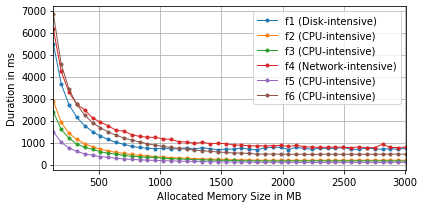

In [12]:
fig=plt.figure(figsize=(6,3))
ax=plt.subplot(111)
ax.grid()
ax.set_xlim(128,3008)
ax.plot(available_mem_list, f1_duration, marker='o', label='f1 (Disk-intensive)', linewidth=1, markersize=3) 
ax.plot(available_mem_list, f2_duration, marker='o', label='f2 (CPU-intensive)', linewidth=1, markersize=3) 
ax.plot(available_mem_list, f3_duration, marker='o', label='f3 (CPU-intensive)', linewidth=1, markersize=3) 
ax.plot(available_mem_list, f4_duration, marker='o', label='f4 (Network-intensive)', linewidth=1, markersize=3) 
ax.plot(available_mem_list, f5_duration, marker='o', label='f5 (CPU-intensive)', linewidth=1, markersize=3) 
ax.plot(available_mem_list, f6_duration, marker='o', label='f6 (CPU-intensive)', linewidth=1, markersize=3) 
ax.legend()
ax.set_xlabel('Allocated Memory Size in MB')
ax.set_ylabel('Duration in ms')
fig.tight_layout()
fig.savefig('App6_Performance_Curve', dpi=300)
fig.savefig('App6_Performance_Curve.pdf')

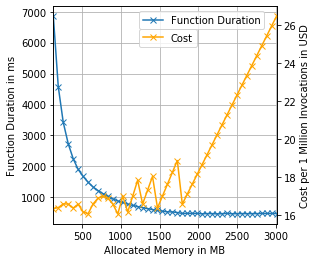

In [14]:
pricing_model={0:0, 128:0.000000208,192:0.000000313,256:0.000000417,320:0.000000521,384:0.000000625,448:0.000000729,512:0.000000834,576:0.000000938,640:0.000001042,704:0.000001146,768:0.00000125,832:0.000001354,896:0.000001459,960:0.000001563,1024:0.000001667,1088:0.000001771,1152:0.000001875,1216:0.00000198,1280:0.000002084,1344:0.000002188,1408:0.000002292,1472:0.000002396,1536:0.000002501,1600:0.000002605,1664:0.000002709,1728:0.000002813,1792:0.000002917,1856:0.000003021,1920:0.000003126,1984:0.00000323,2048:0.000003334,2112:0.000003438,2176:0.000003542,2240:0.000003647,2304:0.000003751,2368:0.000003855,2432:0.000003959,2496:0.000004063,2560:0.000004168,2624:0.000004272,2688:0.000004376,2752:0.00000448,2816:0.000004584,2880:0.000004688,2944:0.000004793,3008:0.000004897}
f6_cost = [np.ceil(dict(zip(available_mem_list, f6_duration))[mem]/100)*pricing_model[mem]*1000000+2 for mem in dict(zip(available_mem_list, f6_duration)).keys()]
fig=plt.figure(figsize=(4,4))
ax=plt.subplot(111)
ax.grid()
ax.set_xlim(128,3008)
ax2 = ax.twinx()
ax.plot(available_mem_list, f6_duration, marker='x', label='Function Duration') 
ax2.plot(available_mem_list, f6_cost, color='orange', marker='x', label='Cost') 
ax.legend(loc='upper left', bbox_to_anchor=(0.36,1))
ax2.legend(loc='upper left', bbox_to_anchor=(0.36,0.92))
ax.set_xlabel('Allocated Memory in MB')
ax.set_ylabel('Function Duration in ms')
ax2.set_ylabel('Cost per 1 Million Invocations in USD')
fig.savefig('Duration_Cost_Mem_Curve', dpi=300, bbox_inches='tight')
fig.savefig('Duration_Cost_Mem_Curve.pdf', bbox_inches='tight')

## Performance Cost Table

### Import Libraries

In [15]:
import sys
sys.path.append('../../../source/ServerlessAppPerfCostMdlOpt')
import networkx as nx
import itertools
import warnings
warnings.filterwarnings("ignore")
from ServerlessAppWorkflow import ServerlessAppWorkflow
from AppGenerator import AppGenerator
from PerfOpt import PerfOpt

### Sample Performance Curve

Sampled Memory List: [128, 320, 512, 704, 896, 1088, 1280, 1472, 1664, 1856, 2048, 2240, 2432, 2624, 2816, 3008]
Length of the Sampled Memory List: 16
Number of Configurations in App6 after Sampling: 16777216


Text(0, 0.5, 'Duration in ms')

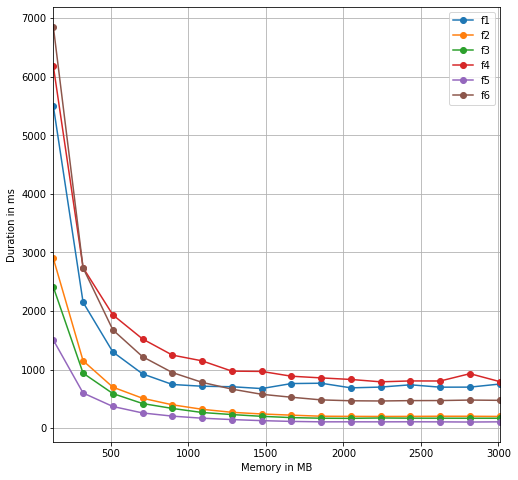

In [16]:
sampled_mem_list = list(range(128, 3072, 192))
number_of_configurations = np.power(len(sampled_mem_list),6)
print('Sampled Memory List:', sampled_mem_list)
print('Length of the Sampled Memory List:', len(sampled_mem_list))
print('Number of Configurations in App6 after Sampling:', number_of_configurations)

fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111)
ax.grid()
ax.set_xlim(128,3008)
ax.plot(list(range(128, 3072, 192)), f1_duration[0:46:3], marker='o', label='f1') 
ax.plot(list(range(128, 3072, 192)), f2_duration[0:46:3], marker='o', label='f2') 
ax.plot(list(range(128, 3072, 192)), f3_duration[0:46:3], marker='o', label='f3') 
ax.plot(list(range(128, 3072, 192)), f4_duration[0:46:3], marker='o', label='f4') 
ax.plot(list(range(128, 3072, 192)), f5_duration[0:46:3], marker='o', label='f5') 
ax.plot(list(range(128, 3072, 192)), f6_duration[0:46:3], marker='o', label='f6') 
ax.legend()
ax.set_xlabel('Memory in MB')
ax.set_ylabel('Duration in ms')

### Get Performance Cost Table

#### Define App Orchestration

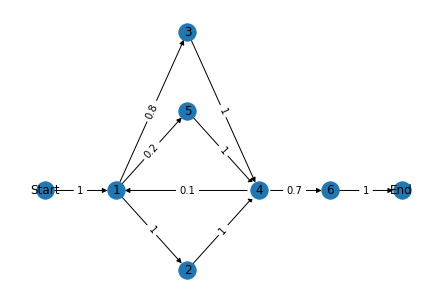

In [17]:
App6_G = nx.DiGraph()
App6_G.add_node('Start', pos=(0, 1))
App6_G.add_node(1, pos=(1, 1), perf_profile={mem:f1_perf_profile[mem] for mem in sampled_mem_list})
App6_G.add_node(2, pos=(2, 0), perf_profile={mem:f2_perf_profile[mem] for mem in sampled_mem_list})
App6_G.add_node(3, pos=(2, 3), perf_profile={mem:f3_perf_profile[mem] for mem in sampled_mem_list})
App6_G.add_node(4, pos=(3, 1), perf_profile={mem:f4_perf_profile[mem] for mem in sampled_mem_list})
App6_G.add_node(5, pos=(2, 2), perf_profile={mem:f5_perf_profile[mem] for mem in sampled_mem_list})
App6_G.add_node(6, pos=(4, 1), perf_profile={mem:f6_perf_profile[mem] for mem in sampled_mem_list})
App6_G.add_node('End', pos=(5, 1))
App6_G.add_weighted_edges_from([(1, 2, 1), (1, 5, 0.2), (1, 3, 0.8), (3, 4, 1), (5, 4, 1), (2, 4, 1), (4, 1, 0.1),
                          (4, 4, 0.2), (4, 6, 0.7)])
App6_G.add_weighted_edges_from([('Start', 1, 1), (6, 'End', 1)])
pos_App6_G = nx.get_node_attributes(App6_G, 'pos')
nx.draw(App6_G, pos_App6_G, with_labels=True)
labels_App6_G = nx.get_edge_attributes(App6_G, 'weight')
nx.draw_networkx_edge_labels(App6_G, pos_App6_G, edge_labels=labels_App6_G)
pos_higher_offset_App6_G = {}
for k, v in pos_App6_G.items():
    pos_higher_offset_App6_G[k] = (v[0], v[1] + 0.15)
plt.savefig('App6_G.png')
plt.show()

#### Define the number of workers

In [18]:
number_of_workers = 32

#### Define the data storage location

In [19]:
pct_data_folder = 'perf_cost_data'

#### Generate Workload

In [20]:
pct_filename_list = [pct_data_folder + '/' + App_name+'_part'+str(n) +'.csv' for n in range(1,number_of_workers+1)]
pct_start_iterations_list = [int(number_of_configurations/number_of_workers * (n-1))+1 for n in range(1,number_of_workers+1)]
pct_end_iterations_list = [n-1 for n in pct_start_iterations_list[1:]]
pct_end_iterations_list.append(number_of_configurations)

#### Run Algorithms to get the table

In [21]:
def pct_work(App_G, filename, start_iterations, end_iterations):
    App = ServerlessAppWorkflow(G=App_G.copy(), delayType='SFN')
    optimizer = PerfOpt(App, generate_perf_profile=False)
    optimizer.get_perf_cost_table(file=filename, start_iterations=start_iterations, end_iterations=end_iterations)

In [22]:
from multiprocessing import Process
for i in range(number_of_workers):
    p = Process(target=pct_work, args=(App6_G, pct_filename_list[i], pct_start_iterations_list[i], pct_end_iterations_list[i],))
    p.start()

Get Performance Cost Table - Task Size: 524288


  0%|          | 7/524288 [00:00<2:13:44, 65.33it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 11/524288 [00:00<2:45:45, 52.72it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 0/524288 [00:00<?, ?it/s] 42.46it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 25/524288 [00:00<3:59:43, 36.45it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 13/524288 [00:00<3:48:39, 38.21it/s]

Get Performance Cost Table - Task Size: 524288
Get Performance Cost Table - Task Size: 524288


  0%|          | 38/524288 [00:00<3:59:57, 36.41it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 46/524288 [00:01<4:17:26, 33.94it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 25/524288 [00:00<4:08:27, 35.17it/s]

Get Performance Cost Table - Task Size: 524288
Get Performance Cost Table - Task Size: 524288


  0%|          | 10/524288 [00:00<2:50:31, 51.24it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 60/524288 [00:01<4:04:25, 35.75it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 62/524288 [00:01<3:48:35, 38.22it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 79/524288 [00:02<3:18:24, 44.03it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 77/524288 [00:01<3:43:01, 39.17it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 83/524288 [00:02<3:21:20, 43.39it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 48/524288 [00:01<2:57:19, 49.27it/s]]

Get Performance Cost Table - Task Size: 524288


  0%|          | 72/524288 [00:01<3:22:40, 43.11it/s]]

Get Performance Cost Table - Task Size: 524288
Get Performance Cost Table - Task Size: 524288


  0%|          | 117/524288 [00:03<4:04:05, 35.79it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 64/524288 [00:01<4:18:36, 33.79it/s]]

Get Performance Cost Table - Task Size: 524288


  0%|          | 15/524288 [00:00<4:50:27, 30.08it/s]]

Get Performance Cost Table - Task Size: 524288


  0%|          | 58/524288 [00:01<4:46:35, 30.49it/s]]

Get Performance Cost Table - Task Size: 524288


  0%|          | 95/524288 [00:02<4:10:39, 34.86it/s]]

Get Performance Cost Table - Task Size: 524288


  0%|          | 142/524288 [00:03<4:30:39, 32.28it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 9/524288 [00:00<3:30:27, 41.52it/s]]]

Get Performance Cost Table - Task Size: 524288


  0%|          | 108/524288 [00:02<4:06:55, 35.38it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 18/524288 [00:00<4:41:54, 31.00it/s]]

Get Performance Cost Table - Task Size: 524288


  0%|          | 112/524288 [00:02<4:51:04, 30.01it/s]

Get Performance Cost Table - Task Size: 524288


  0%|          | 11/524288 [00:00<4:14:03, 34.39it/s]]

Get Performance Cost Table - Task Size: 524288


  0%|          | 140/524288 [00:03<3:35:47, 40.48it/s]

Get Performance Cost Table - Task Size: 524288


100%|██████████| 524288/524288 [4:29:59<00:00, 32.36it/s]


### Process Performance Cost Table

In [23]:
perf_cost_data = pd.DataFrame()
for filename in pct_filename_list:
    data_parts = pd.read_csv(filename, error_bad_lines=False, warn_bad_lines=False,low_memory=False)
    perf_cost_data = perf_cost_data.append(data_parts)
perf_cost_data = perf_cost_data[['1','2','3','4','5','6','Cost','RT']]
perf_cost_data.columns=['f1','f2','f3','f4','f5','f6','Cost','RT']
perf_cost_data.index=range(1,perf_cost_data.shape[0]+1)
perf_cost_data.head()

,f1,f2,f3,f4,f5,f6,Cost,RT
1,128.0,128.0,128.0,128.0,128.0,128.0,59.666971,25433.083814
2,128.0,128.0,128.0,128.0,128.0,320.0,59.902971,21315.749814
3,128.0,128.0,128.0,128.0,128.0,512.0,59.492971,20257.932514
4,128.0,128.0,128.0,128.0,128.0,704.0,60.212971,19799.567714
5,128.0,128.0,128.0,128.0,128.0,896.0,59.904971,19529.305514


In [24]:
minimal_cost = perf_cost_data['Cost'].min()
maximal_cost = perf_cost_data['Cost'].max()
minimal_rt = perf_cost_data['RT'].min()
maximal_rt = perf_cost_data['RT'].max()
print('Minimal Cost: ', minimal_cost, 'per 1 million executions')
print('Maximal Cost: ', maximal_cost, 'per 1 million executions')
print('Minimal RT: ', minimal_rt, 'ms')
print('Maximal RT: ', maximal_rt, 'ms')

Minimal Cost:  58.864914285714285 per 1 million executions
Maximal Cost:  163.8975714285714 per 1 million executions
Minimal RT:  2748.244071428571 ms
Maximal RT:  25433.083814285717 ms


## Optimization Curve

### Get Optimization Curve Data

#### Define Parameters

In [25]:
App6_ocd_budget_num_of_points = 100
App6_ocd_performance_constraint_num_of_points = 100
App6_ocd_filenameprefix = 'opt_curve_data/App6'

In [26]:
def ocd_work(App_G, filenameprefix, budget_num, performance_constraint_num):
    App = ServerlessAppWorkflow(G=App_G.copy(), delayType='SFN')
    optimizer = PerfOpt(App, generate_perf_profile=False)
    optimizer.get_opt_curve(filenameprefix=filenameprefix, budget_list=list(np.linspace(optimizer.minimal_cost, optimizer.maximal_cost, budget_num)), performance_constraint_list=list(np.linspace(optimizer.minimal_avg_rt, optimizer.maximal_avg_rt, performance_constraint_num)))

#### Run Algorithms to get the curve

In [27]:
%%capture
ocd_work(App6_G, App6_ocd_filenameprefix, App6_ocd_budget_num_of_points, App6_ocd_performance_constraint_num_of_points)

### Process Optimization Curve Data

In [34]:
opt_curve_data_BPBC = pd.read_csv(App6_ocd_filenameprefix+'_BPBC.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)
opt_curve_data_BPBC = opt_curve_data_BPBC.assign(Best_Answer_RT=lambda opt_curve_data_BPBC: opt_curve_data_BPBC[['BCR_disabled_RT', 'BCR_RT/M_RT', 'BCR_ERT/C_RT', 'BCR_MAX_RT']].min(1))
opt_curve_data_BCPC = pd.read_csv(App6_ocd_filenameprefix+'_BCPC.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)
opt_curve_data_BCPC = opt_curve_data_BCPC.assign(Best_Answer_Cost=lambda opt_curve_data_BCPC: opt_curve_data_BCPC[['BCR_disabled_Cost', 'BCR_M/RT_Cost', 'BCR_C/ERT_Cost', 'BCR_MAX_Cost']].min(1))

In [35]:
opt_curve_data_BPBC.head(2)

,Budget,BCR_disabled_RT,BCR_RT/M_RT,BCR_ERT/C_RT,BCR_MAX_RT,BCR_disabled_Cost,BCR_RT/M_Cost,BCR_ERT/C_Cost,BCR_MAX_Cost,BCR_disabled_Config,BCR_RT/M_Config,BCR_ERT/C_Config,BCR_MAX_Config,BCR_disabled_Iterations,BCR_RT/M_Iterations,BCR_ERT/C_Iterations,BCR_MAX_Iterations,BCR_threshold,Best_Answer_RT
0,59.666971,10868.5009,10868.5009,25433.083814,10868.500900,59.599543,59.599543,59.666971,59.599543,"{1: 896, 2: 896, 3: 1088, 4: 128, 5: 512, 6: 1...","{1: 896, 2: 896, 3: 1088, 4: 128, 5: 512, 6: 1...","{1: 128, 2: 128, 3: 128, 4: 128, 5: 128, 6: 128}","{1: 896, 2: 896, 3: 1088, 4: 128, 5: 512, 6: 1...",9.0,9.0,3.0,9.0,0.2,10868.5009
1,60.623644,10772.8808,10772.8808,13629.086743,11727.572671,60.328543,60.328543,60.447400,59.980800,"{1: 896, 2: 896, 3: 1088, 4: 128, 5: 512, 6: 1...","{1: 896, 2: 896, 3: 1088, 4: 128, 5: 512, 6: 1...","{1: 896, 2: 128, 3: 128, 4: 128, 5: 128, 6: 1856}","{1: 896, 2: 320, 3: 320, 4: 128, 5: 512, 6: 1472}",8.0,8.0,5.0,8.0,0.2,10772.8808


In [36]:
opt_curve_data_BCPC.head(2)

,Performance_Constraint,BCR_disabled_RT,BCR_M/RT_RT,BCR_C/ERT_RT,BCR_MAX_RT,BCR_disabled_Cost,BCR_M/RT_Cost,BCR_C/ERT_Cost,BCR_MAX_Cost,BCR_disabled_Config,BCR_M/RT_Config,BCR_C/ERT_Config,BCR_MAX_Config,BCR_disabled_Iterations,BCR_M/RT_Iterations,BCR_C/ERT_Iterations,BCR_MAX_Iterations,BCR_threshold,Best_Answer_Cost
0,2853.318043,2851.234229,2851.234229,2851.234229,2852.520811,87.416771,87.416771,87.416771,91.295400,"{1: 896, 2: 1856, 3: 1664, 4: 2240, 5: 1088, 6...","{1: 896, 2: 1856, 3: 1664, 4: 2240, 5: 1088, 6...","{1: 896, 2: 1856, 3: 1664, 4: 2240, 5: 1088, 6...","{1: 1088, 2: 2048, 3: 1664, 4: 2240, 5: 512, 6...",9.0,9.0,9.0,15.0,0.2,87.416771
1,3081.396485,3070.231189,3070.231189,3070.231189,3061.305594,87.150714,87.150714,87.150714,78.376829,"{1: 704, 2: 1856, 3: 1664, 4: 2240, 5: 704, 6:...","{1: 704, 2: 1856, 3: 1664, 4: 2240, 5: 704, 6:...","{1: 704, 2: 1856, 3: 1664, 4: 2240, 5: 704, 6:...","{1: 896, 2: 1472, 3: 1664, 4: 1664, 5: 512, 6:...",9.0,9.0,9.0,19.0,0.2,78.376829


In [37]:
best_rt = [perf_cost_data.query("Cost<={}".format(item))['RT'].min() for item in opt_curve_data_BPBC['Budget']]
best_cost = [perf_cost_data.query("RT<={}".format(item))['Cost'].min() for item in opt_curve_data_BCPC['Performance_Constraint']]
BPBC_accuracy = 100-(opt_curve_data_BPBC['Best_Answer_RT']-best_rt)/opt_curve_data_BPBC['Best_Answer_RT']*100
BCPC_accuracy = 100-(opt_curve_data_BCPC['Best_Answer_Cost']-best_cost)/opt_curve_data_BCPC['Best_Answer_Cost']*100

In [38]:
with open('results.json', 'w', encoding='utf-8') as f:
    json.dump({
               "BPBC_BCR_disabled_Iterations":opt_curve_data_BPBC["BCR_disabled_Iterations"].mean(),
               "BPBC_BCR_RT/M_Iterations":opt_curve_data_BPBC["BCR_RT/M_Iterations"].mean(),
               "BPBC_BCR_ERT/C_Iterations":opt_curve_data_BPBC["BCR_ERT/C_Iterations"].mean(),
               "BPBC_BCR_MAX_Iterations":opt_curve_data_BPBC["BCR_MAX_Iterations"].mean(),
               "BCPC_BCR_disabled_Iterations":opt_curve_data_BCPC["BCR_disabled_Iterations"].mean(),
               "BCPC_BCR_M/RT_Iterations":opt_curve_data_BCPC["BCR_M/RT_Iterations"].mean(),
               "BCPC_BCR_C/ERT_Iterations":opt_curve_data_BCPC["BCR_C/ERT_Iterations"].mean(),
               "BCPC_BCR_MAX_Iterations":opt_curve_data_BCPC["BCR_MAX_Iterations"].mean()
              }, f, ensure_ascii=False, indent=4)

### BPBC Problem

Average Accuracy:  97.4017930932104


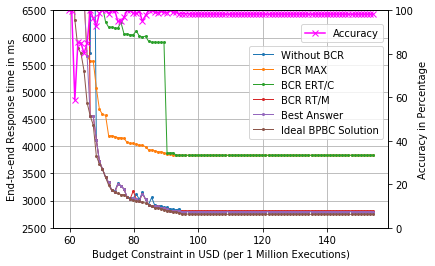

In [41]:
fig=plt.figure(figsize=(6,4))
ax=plt.subplot(111)
ax.grid()
ax.plot(opt_curve_data_BPBC['Budget'], opt_curve_data_BPBC['BCR_disabled_RT'], marker='o', label='Without BCR', markersize=2, linewidth=1)
ax.plot(opt_curve_data_BPBC['Budget'], opt_curve_data_BPBC['BCR_MAX_RT'], marker='o', label='BCR MAX', markersize=2, linewidth=1) 
ax.plot(opt_curve_data_BPBC['Budget'], opt_curve_data_BPBC['BCR_ERT/C_RT'], marker='o', label='BCR ERT/C', markersize=2, linewidth=1)
ax.plot(opt_curve_data_BPBC['Budget'], opt_curve_data_BPBC['BCR_RT/M_RT'], marker='o', label='BCR RT/M', markersize=2, linewidth=1)  
ax.plot(opt_curve_data_BPBC['Budget'], opt_curve_data_BPBC['Best_Answer_RT'] , marker='o', label='Best Answer', markersize=2, linewidth=1) 
ax.plot(opt_curve_data_BPBC['Budget'], best_rt, marker='o', label='Ideal BPBC Solution', markersize=2, linewidth=1) 
ax.legend(loc='upper right', bbox_to_anchor=(1,0.86))
ax.set_xlabel('Budget Constraint in USD (per 1 Million Executions)')
ax.set_ylabel('End-to-end Response time in ms')
ax.set_ylim(2500,6500)
ax2 = ax.twinx()
ax2.plot(opt_curve_data_BPBC['Budget'], BPBC_accuracy, marker = 'x', label='Accuracy', color='magenta')
ax2.legend(loc='upper right', bbox_to_anchor=(1,0.96))
ax2.set_ylim(0,100)
ax2.set_ylabel('Accuracy in Percentage')
fig.savefig('App6_Optimization_Curve_BPBC', dpi=300)
fig.savefig('App6_Optimization_Curve_BPBC.pdf')
print('Average Accuracy: ',BPBC_accuracy.mean())

### BCPC Problem

Average Accuracy:  99.63305400042249


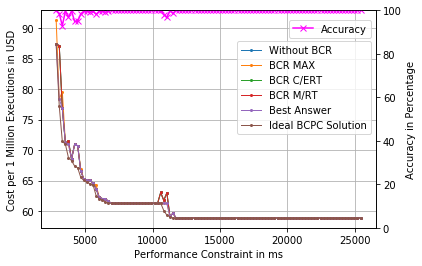

In [43]:
fig=plt.figure(figsize=(6,4))
ax=plt.subplot(111)
ax.grid()
ax.plot(opt_curve_data_BCPC['Performance_Constraint'], opt_curve_data_BCPC['BCR_disabled_Cost'], marker='o', label='Without BCR', markersize=2, linewidth=1)
ax.plot(opt_curve_data_BCPC['Performance_Constraint'], opt_curve_data_BCPC['BCR_MAX_Cost'], marker='o', label='BCR MAX', markersize=2, linewidth=1) 
ax.plot(opt_curve_data_BCPC['Performance_Constraint'], opt_curve_data_BCPC['BCR_C/ERT_Cost'], marker='o', label='BCR C/ERT', markersize=2, linewidth=1) 
ax.plot(opt_curve_data_BCPC['Performance_Constraint'], opt_curve_data_BCPC['BCR_M/RT_Cost'], marker='o', label='BCR M/RT', markersize=2, linewidth=1) 
ax.plot(opt_curve_data_BCPC['Performance_Constraint'], opt_curve_data_BCPC['Best_Answer_Cost'] , marker='o', label='Best Answer', markersize=2, linewidth=1) 
ax.plot(opt_curve_data_BCPC['Performance_Constraint'], best_cost, marker='o', label='Ideal BCPC Solution', markersize=2, linewidth=1) 
ax.legend(loc='upper right', bbox_to_anchor=(1,0.88))
ax.set_xlabel('Performance Constraint in ms')
ax.set_ylabel('Cost per 1 Million Executions in USD')
ax2 = ax.twinx()
ax2.plot(opt_curve_data_BCPC['Performance_Constraint'], BCPC_accuracy, marker = 'x', label='Accuracy', color='magenta')
ax2.legend(loc='upper right', bbox_to_anchor=(1,0.98))
ax2.set_ylim(0,100)
ax2.set_ylabel('Accuracy in Percentage')
fig.savefig('App6_Optimization_Curve_BCPC', dpi=300)
fig.savefig('App6_Optimization_Curve_BCPC.pdf')
print('Average Accuracy: ', BCPC_accuracy.mean())